In [4]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from dynamics import calculate_dynamics, discrete_fourier_transform

In [5]:
def fourier_figure(ax, per, fourier, peaks, color_line='dodgerblue', color_marker='firebrick'):
    ax.loglog(per, fourier, color=color_line, linewidth=0.8)
    ax.loglog(per[peaks], fourier[peaks], "D", color=color_marker, markersize=0.8)

    ax.set_xlim(min(per), per[1])
    ax.set_xlabel(r'period [$J^{-1}$]')
    ax.set_ylabel('amplitude [a.u.]')

In [6]:
Omega = 4
g = 0.35
hop = np.array([1, 2])
Ncells = 8
nmax = 50
parameters = {'Omega': Omega, 'g': g, 'hop': hop, 'Ncells': Ncells, 'nmax': nmax}

time = np.arange(0, 100000, 100)

# electronic initial state: first site of the chain
psi_0_elec = qt.basis(2 * Ncells, 0)
# photonic initial state: nphot
nphot = 2
psi_0_phot = qt.basis(nmax + 1, nphot)

prob_pho, prob_elec = calculate_dynamics(psi_0_elec, psi_0_phot, time, **parameters)

Computing dynamics:   0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
per, fourier, peaks = discrete_fourier_transform(prob_elec[:, 0], time, height=20)

C:\Users\atypi\OneDrive\Open projects\Anomalous topological insulator\quantum_anomalous\dynamics.py:44: RuntimeWarning: divide by zero encountered in divide
  per = 1 / freq


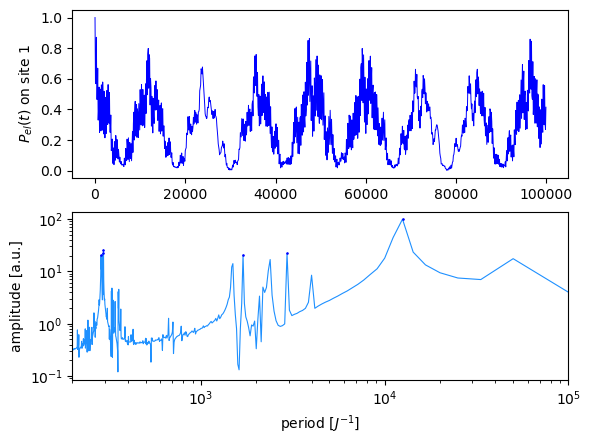

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(time, np.real(prob_elec[:, 0]), color='blue', linewidth=0.7)
ax1.set_ylabel(r"$P_{el}(t)$ on site 1")
fourier_figure(ax2, per, fourier, peaks, color_line='dodgerblue', color_marker='blue')